# Vorbereitung

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn import linear_model, tree, metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [512]:
df = pd.read_csv('/content/drive/MyDrive/exams.csv', encoding='latin-1')

# 2 Data Understanding

**2.1 Spaltenbeschreibung**

In [475]:
# Ausgabe der Spalten
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**2.2 Einblick in das Datenset**

In [476]:
df.shape

(1000, 8)

In [477]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [478]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [479]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [480]:
df['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [481]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [482]:
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   
5  female        group D                 high school      standard   
6  female        group A           bachelor's degree      standard   
7    male        group E                some college      standard   
8    male        group D                 high school      standard   
9    male        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68  
5                    none          63             77             76  
6                    none          62             59             63  
7               completed          93             88             84  
8                    none          63             56             65  
9                    none          47             42             45

In [483]:
df.describe()

math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000

<Axes: xlabel='gender', ylabel='count'>

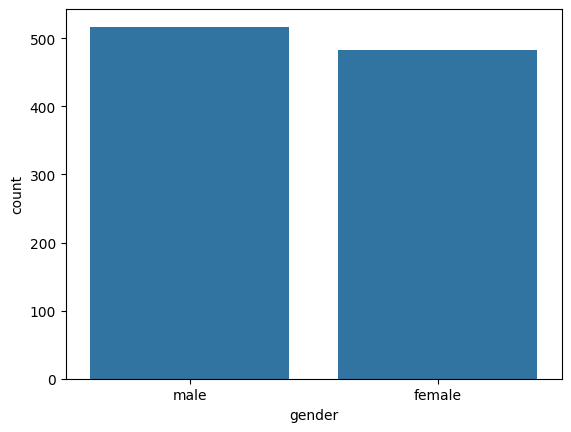

In [484]:
sns.countplot(data = df, x='gender')

<Axes: xlabel='test preparation course', ylabel='count'>

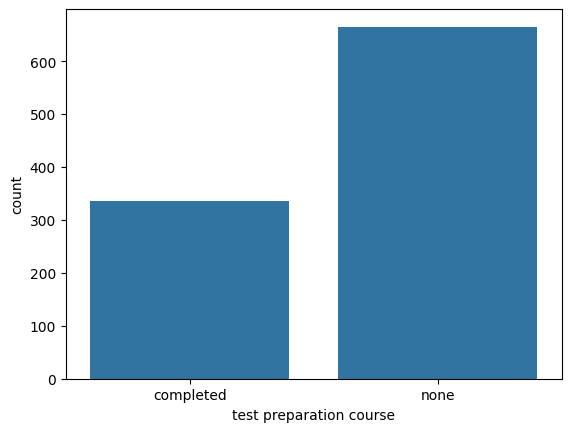

In [485]:
sns.countplot(x='test preparation course' ,data=df)

In [486]:
fig = px.histogram(df, x="race/ethnicity", color="race/ethnicity", width=800, height=500, title="Frequency Distribution of Race")
fig.show()

<ipython-input-487-88a3a61a612e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-487-88a3a61a612e>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-487-88a3a61a612e>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




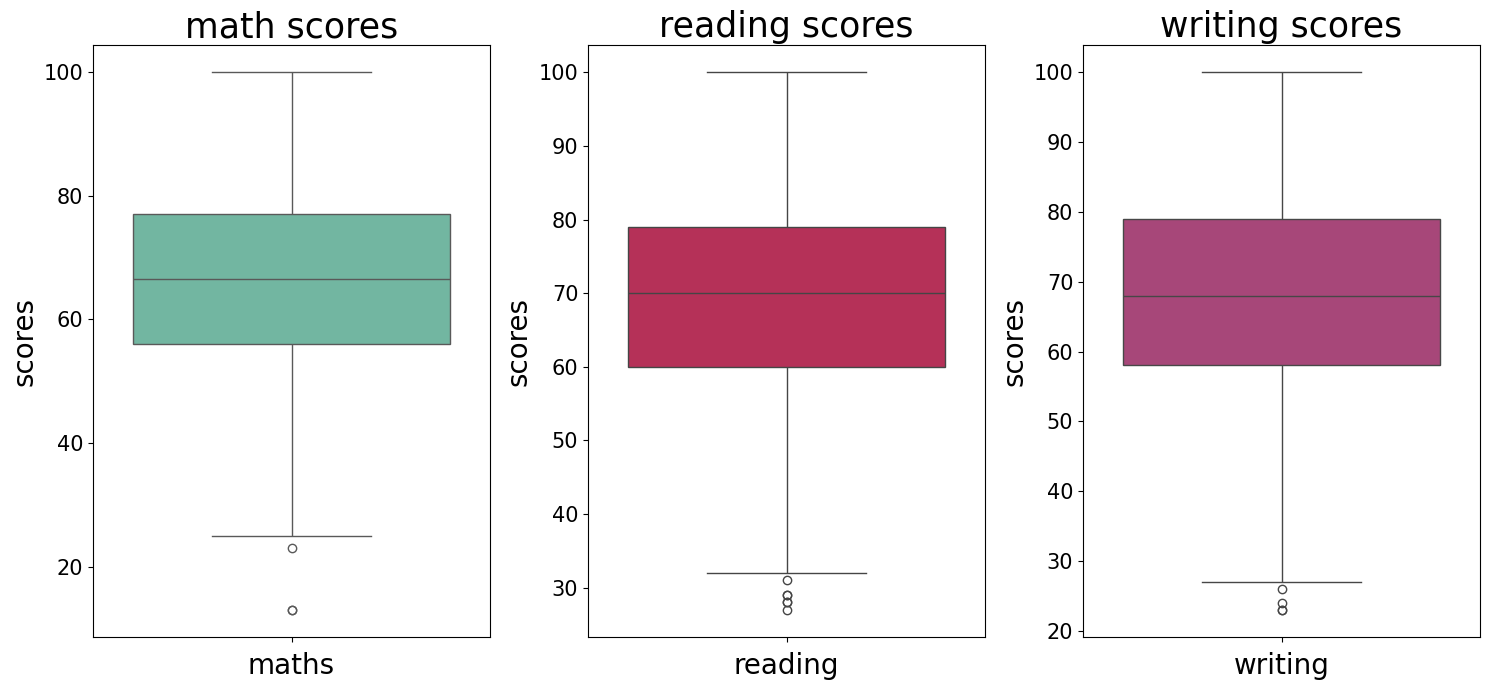

In [487]:
fig , ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(15,7))

ax = plt.subplot(1,3,1)
sns.boxplot(data= df, y = 'math score',ax=ax,palette='Set2',)
plt.title('math scores', size = 25)
plt.ylabel('scores', size = 20)
plt.xlabel('maths' , size = 20)
plt.yticks(size=15)
plt.xticks(size=15)

ax = plt.subplot(1,3,2)
sns.boxplot(data= df, y = 'reading score',ax=ax,palette='rocket',)
plt.title('reading scores', size = 25)
plt.ylabel('scores', size = 20)
plt.xlabel('reading' , size = 20)
plt.yticks(size=15)
plt.xticks(size=15)

ax = plt.subplot(1,3,3)
sns.boxplot(data= df, y = 'writing score',ax=ax,palette='magma',)
plt.title('writing scores', size = 25)
plt.ylabel('scores', size = 20)
plt.xlabel('writing' , size = 20)
plt.yticks(size=15)
plt.xticks(size=15)

fig.tight_layout()

**2.3 Wichtige Variablen**

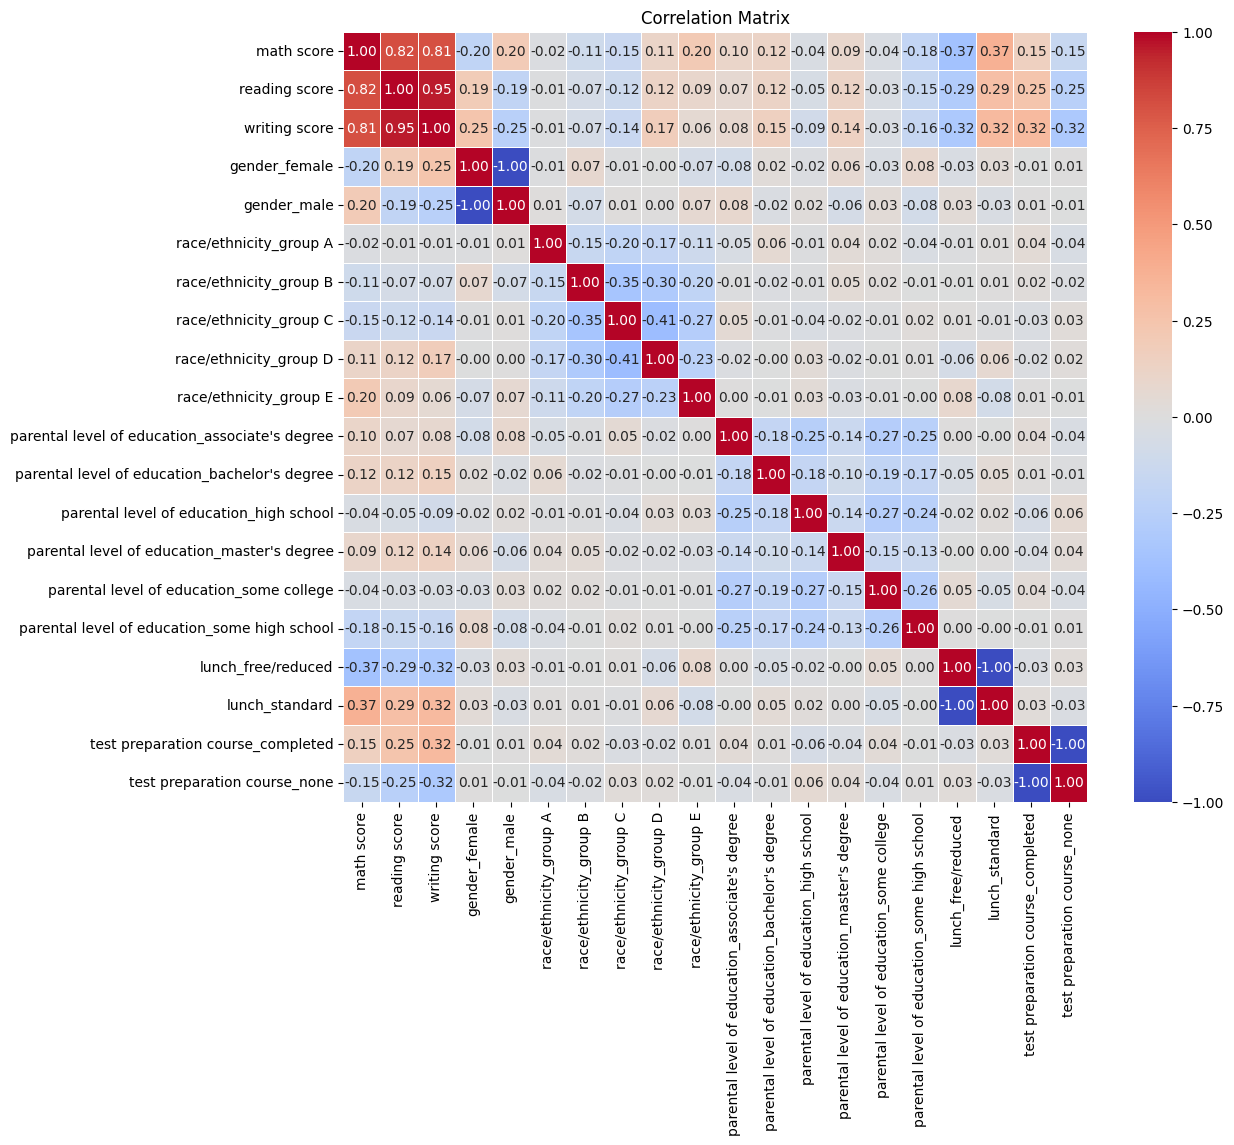

In [488]:
# Korrelations Matrix
df_dummies = pd.get_dummies(df)
correlation_matrix = df_dummies.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**2.4 Ausreisser**

{'whiskers': [<matplotlib.lines.Line2D at 0x7c90232a9e40>,
 'caps': [<matplotlib.lines.Line2D at 0x7c90232aa380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c90232a9ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c90232aa8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c90232aab60>],
 'means': []}

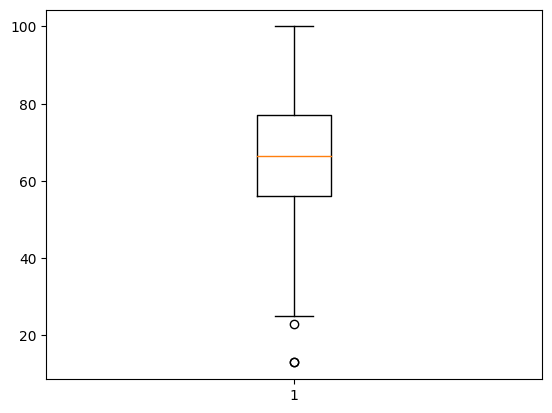

In [489]:
plt.boxplot(df['math score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9023832e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7c90238333d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9023832bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9023833910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9023833bb0>],
 'means': []}

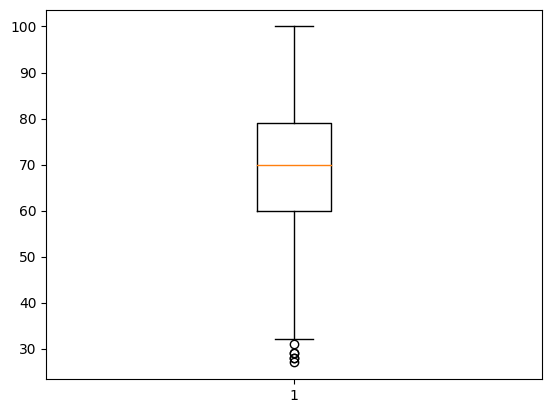

In [490]:
plt.boxplot(df['reading score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c902388d750>,
 'caps': [<matplotlib.lines.Line2D at 0x7c902388dc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c902388d4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c902388e1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c902388e470>],
 'means': []}

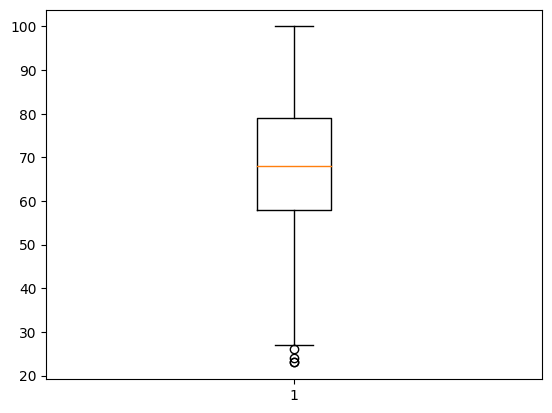

In [491]:
plt.boxplot(df['writing score'])

In [492]:
scores = ['math score', 'reading score','writing score']

**2.4.1** Geschlecht vs Score

<ipython-input-493-d899ebd31ded>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-493-d899ebd31ded>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-493-d899ebd31ded>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




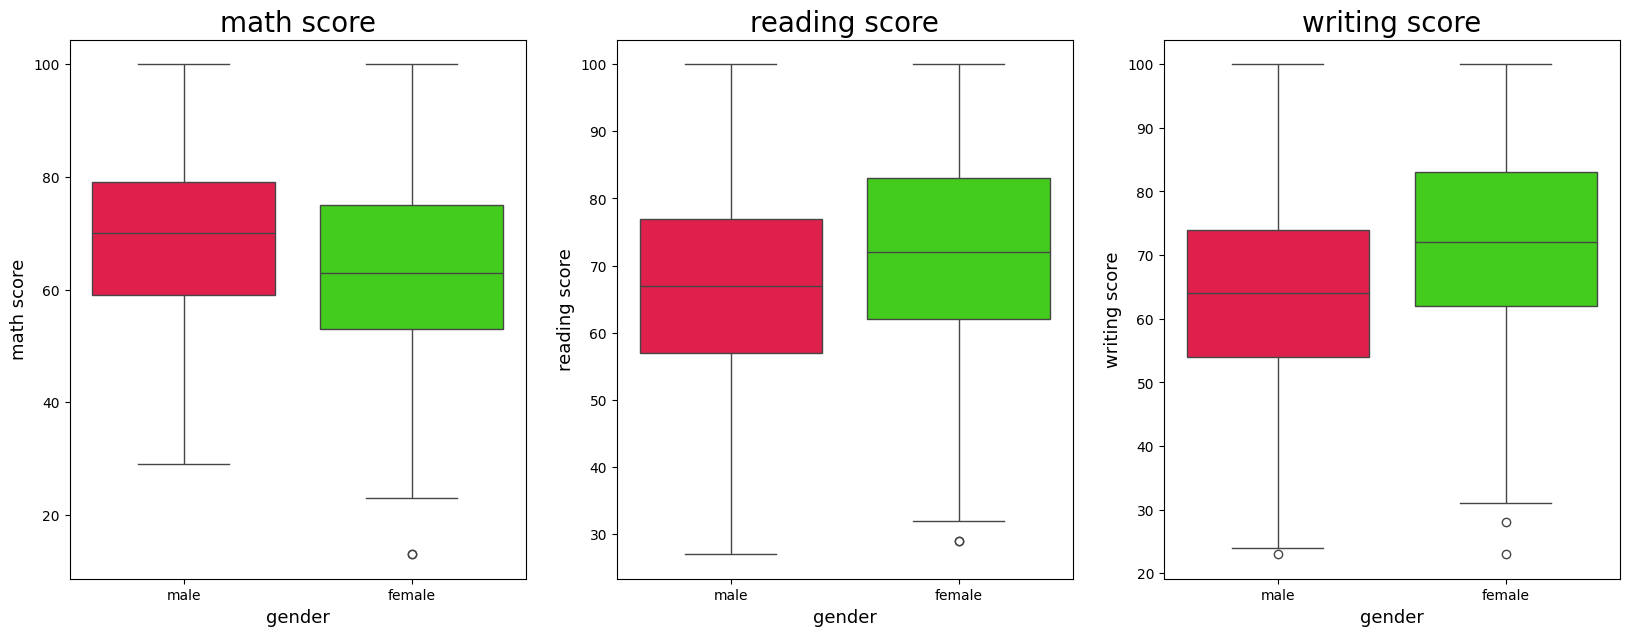

In [493]:
fig , ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(20,7))
j = 1
for i in df[scores]:
    ax = plt.subplot(1,3,j)
    sns.boxplot(data= df,x='gender', y = i ,ax=ax,palette='prism_r',)
    plt.title(f'{i}', size = 20)
    plt.ylabel(f'{i}', size = 13)
    plt.xlabel('gender' , size = 13)
    plt.yticks(size=10)
    plt.xticks(size=10)
    j += 1

**2.4.2** race/enthnicity vs score

<ipython-input-494-c8eda82ab4d1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-494-c8eda82ab4d1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-494-c8eda82ab4d1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




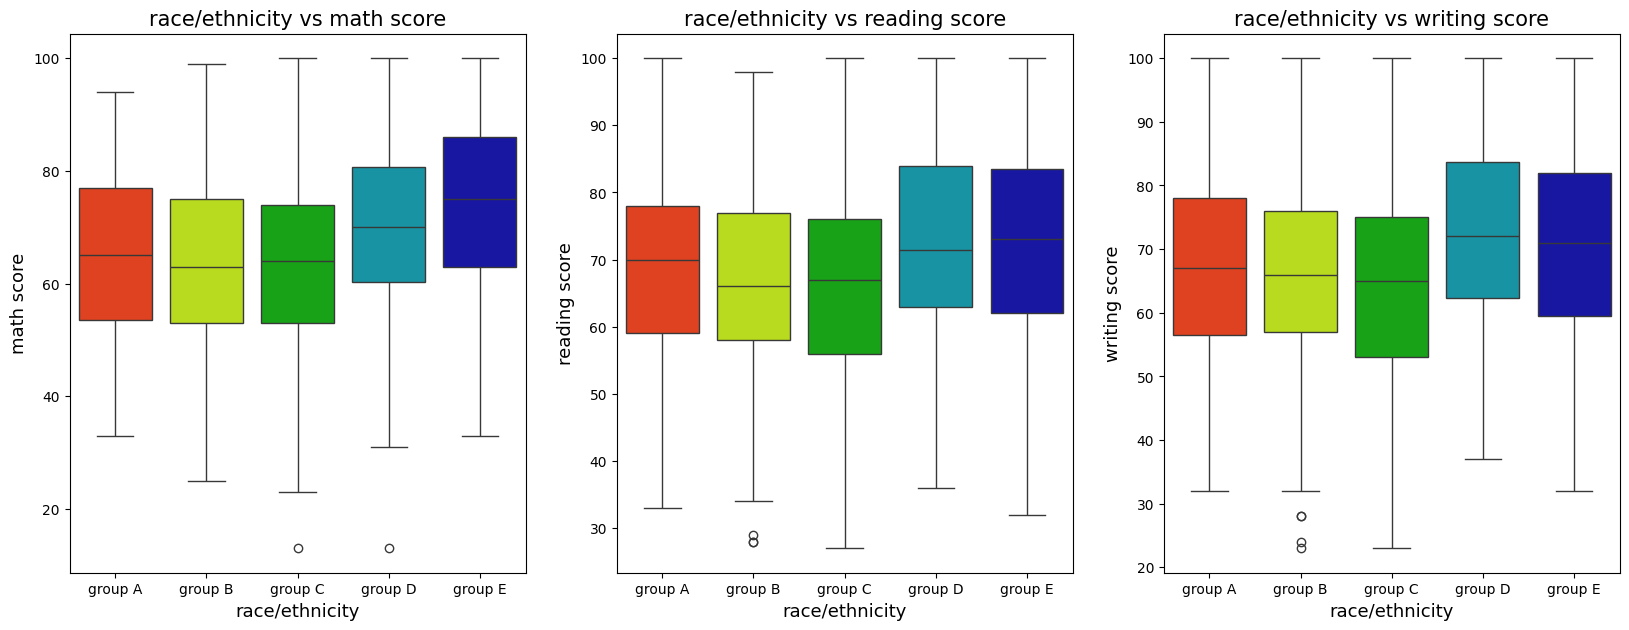

In [494]:
fig , ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(20,7))
j = 1
for i in df[scores]:
    data = df.sort_values('race/ethnicity')
    ax = plt.subplot(1,3,j)
    sns.boxplot(data= data, x='race/ethnicity', y = i ,ax=ax,palette='nipy_spectral_r')
    plt.title(f'race/ethnicity vs {i}', size = 15)
    plt.ylabel(f'{i}', size = 13)
    plt.xlabel('race/ethnicity' , size = 13)
    plt.yticks(size=10)
    plt.xticks(size=10)
    j += 1

**2.4.3** parental level of education vs score

<ipython-input-495-4261e8486e0b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-495-4261e8486e0b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-495-4261e8486e0b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




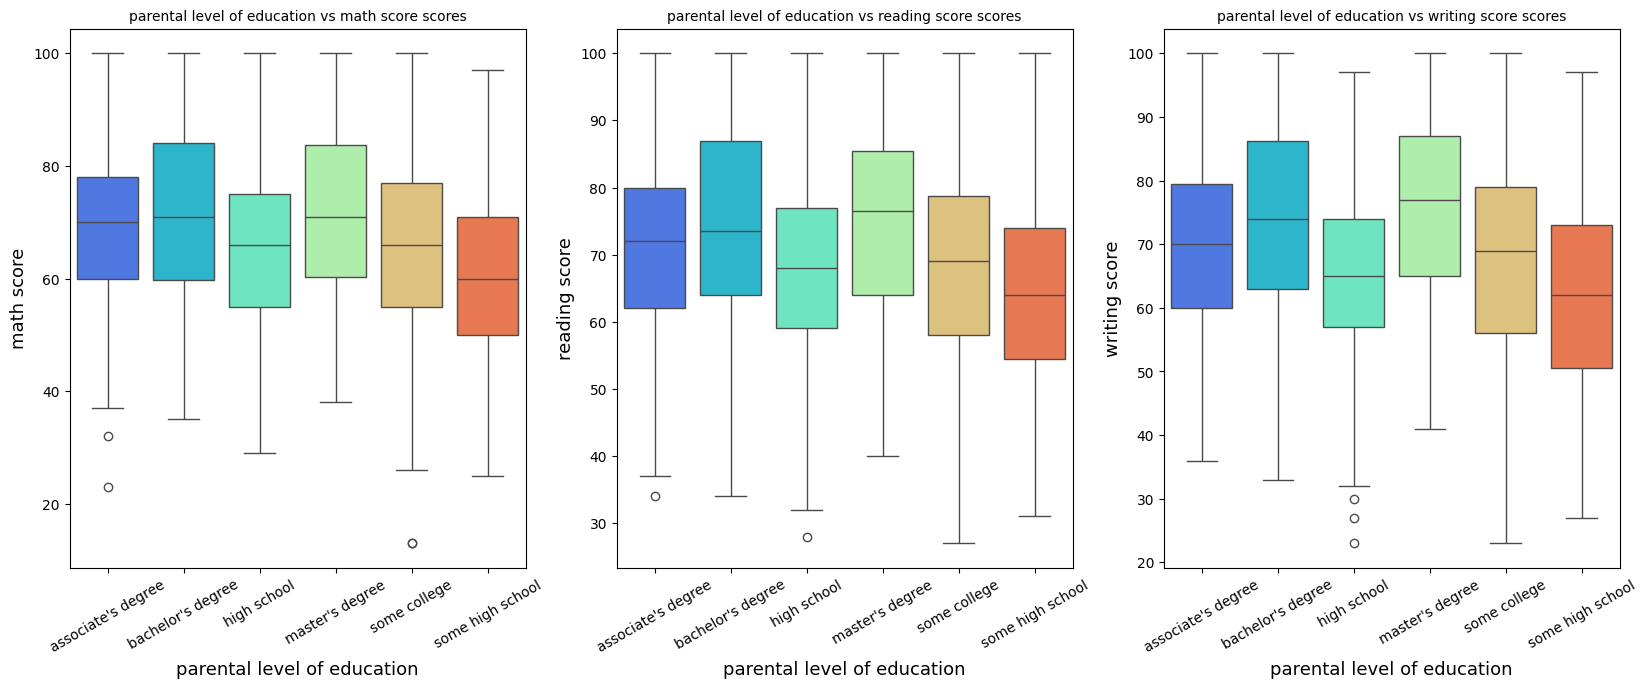

In [495]:
fig , ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(20,7))
j = 1
for i in df[scores]:
    data = df.sort_values('parental level of education')
    ax = plt.subplot(1,3,j)
    sns.boxplot(data= data, x='parental level of education', y = i ,ax=ax,palette='rainbow')
    plt.title(f'parental level of education vs {i} scores', size = 10)
    plt.ylabel(f'{i}', size = 13)
    plt.xlabel('parental level of education' , size = 13)
    plt.yticks(size=10)
    plt.xticks(size=10, rotation = 30)
    j += 1

**2.4.4** test preparation course attendance vs score

<ipython-input-496-d0c08ecf5074>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-496-d0c08ecf5074>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-496-d0c08ecf5074>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




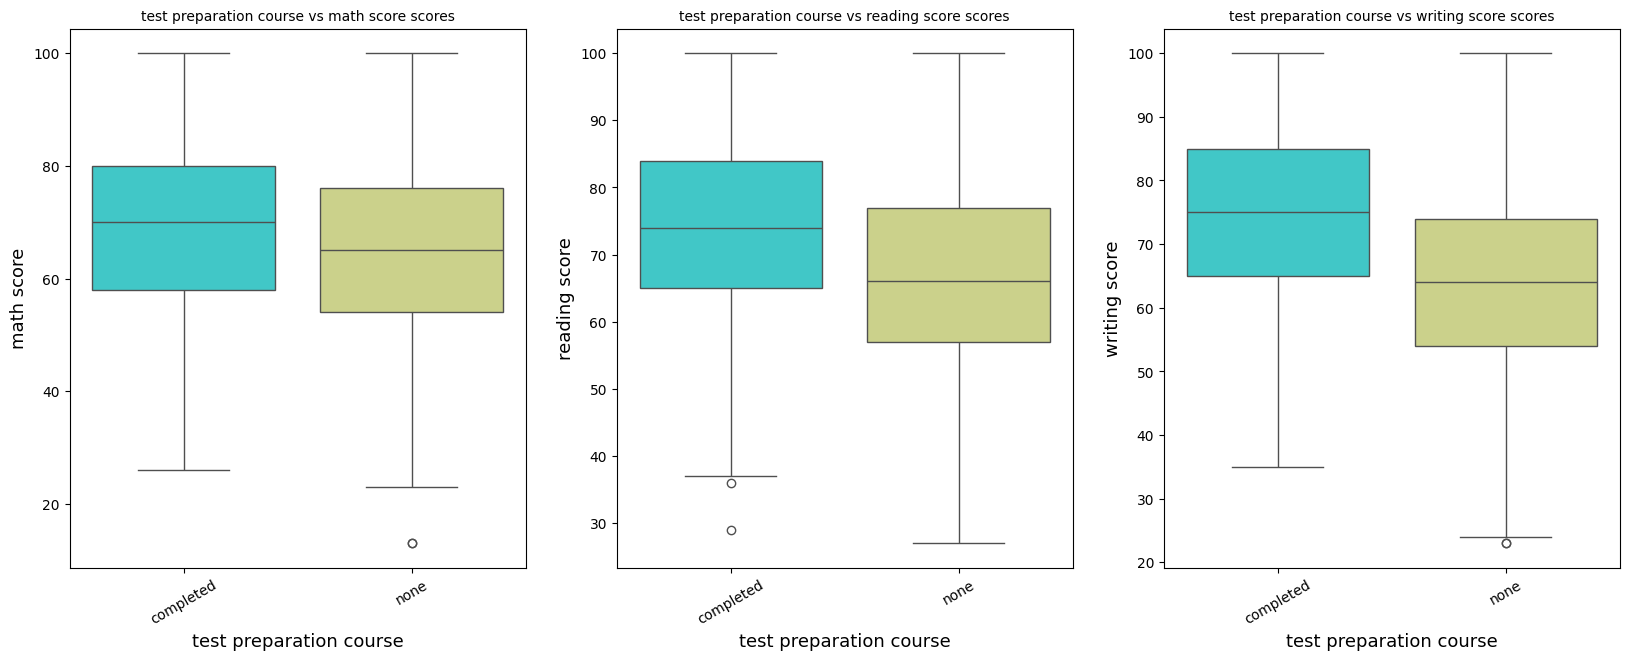

In [496]:
fig , ax = plt.subplots(nrows=1 , ncols= 3 , figsize=(20,7))
j = 1
for i in df[scores]:
    data = df.sort_values('test preparation course')
    ax = plt.subplot(1,3,j)
    sns.boxplot(data= data, x='test preparation course', y = i ,ax=ax,palette='rainbow')
    plt.title(f'test preparation course vs {i} scores', size = 10)
    plt.ylabel(f'{i}', size = 13)
    plt.xlabel('test preparation course' , size = 13)
    plt.yticks(size=10)
    plt.xticks(size=10, rotation = 30)
    j += 1

**2.5 Hypothesen**

**2.5.1** Hypothese 1

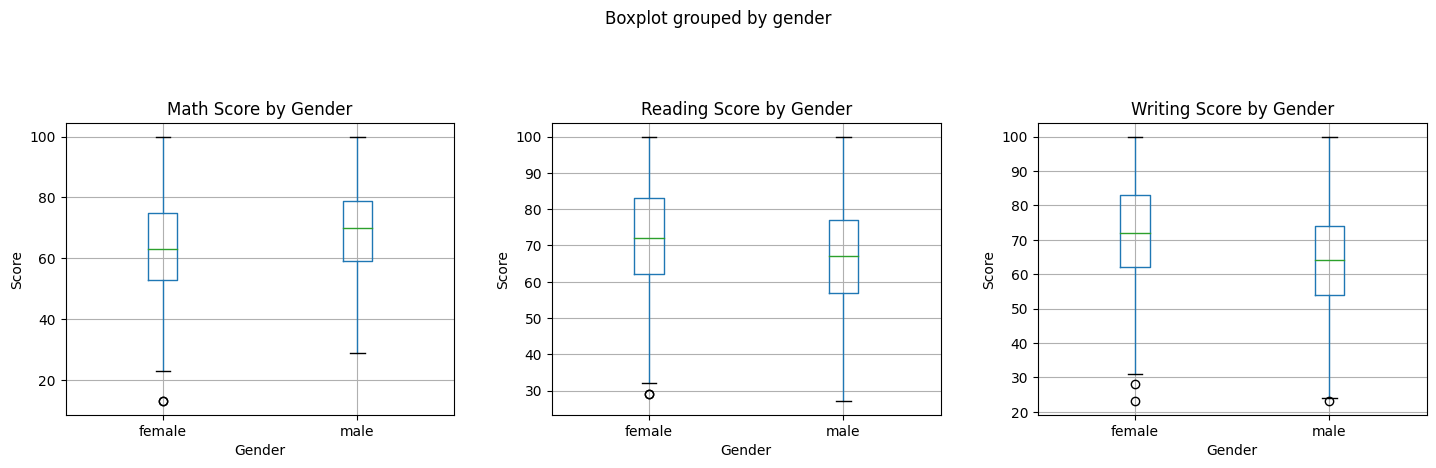

In [497]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

boxplot1 = df.boxplot(column=['math score'], by='gender', ax=axes[0], labels=['female', 'male'])
boxplot2 = df.boxplot(column=['reading score'], by='gender', ax=axes[1], labels=['female', 'male'])
boxplot3 = df.boxplot(column=['writing score'], by='gender', ax=axes[2], labels=['female', 'male'])

boxplot1.set_title('Math Score by Gender')
boxplot1.set_ylabel('Score')
boxplot1.set_xlabel('Gender')

boxplot2.set_title('Reading Score by Gender')
boxplot2.set_ylabel('Score')
boxplot2.set_xlabel('Gender')

boxplot3.set_title('Writing Score by Gender')
boxplot3.set_ylabel('Score')
boxplot3.set_xlabel('Gender')

plt.tight_layout(pad=3.0)
plt.show()

**2.5.2** Hypothese 2

In [498]:
# parental level of education in numerische Werte umwandeln
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

df['parental level of education'] = df['parental level of education'].map(education_mapping)

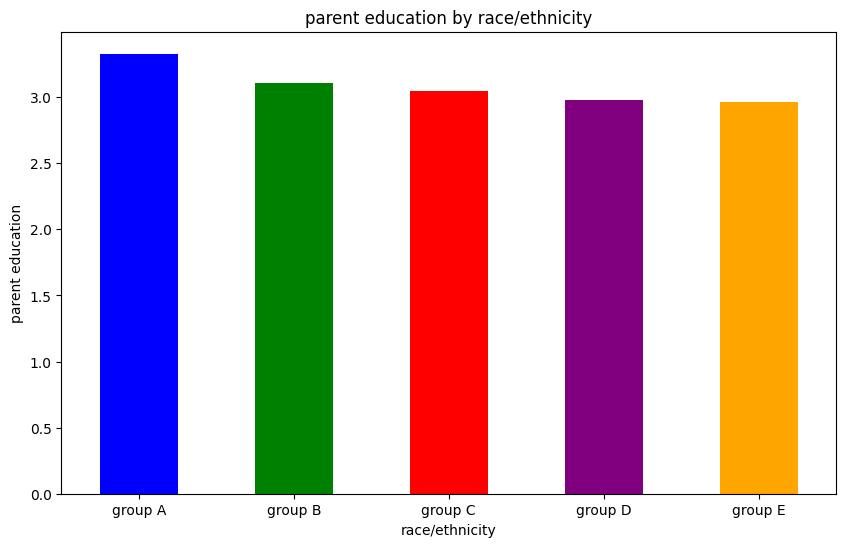

In [499]:
mean_parental_education = df.groupby('race/ethnicity')['parental level of education'].mean()
colors = ['blue', 'green', 'red', 'purple', 'orange']
mean_parental_education.plot(kind='bar', figsize=(10,6), color=colors)

plt.title('parent education by race/ethnicity')
plt.ylabel('parent education')
plt.xlabel('race/ethnicity')
plt.xticks(rotation=0)

plt.show()

**2.5.3** Hypothese 3

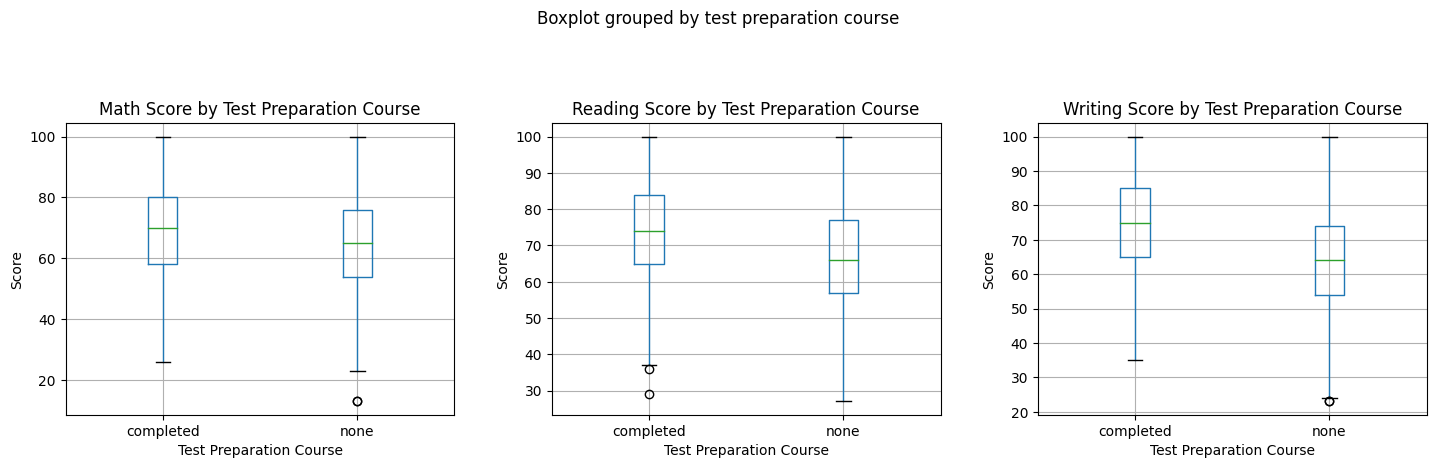

In [500]:
# Boxplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

boxplot1 = df.boxplot(column=['math score'], by='test preparation course', ax=axes[0])
boxplot1.set_title('Math Score by Test Preparation Course')
boxplot1.set_ylabel('Score')
boxplot1.set_xlabel('Test Preparation Course')

boxplot2 = df.boxplot(column=['reading score'], by='test preparation course', ax=axes[1])
boxplot2.set_title('Reading Score by Test Preparation Course')
boxplot2.set_ylabel('Score')
boxplot2.set_xlabel('Test Preparation Course')

boxplot3 = df.boxplot(column=['writing score'], by='test preparation course', ax=axes[2])
boxplot3.set_title('Writing Score by Test Preparation Course')
boxplot3.set_ylabel('Score')
boxplot3.set_xlabel('Test Preparation Course')

plt.tight_layout(pad=3.0)
plt.show()

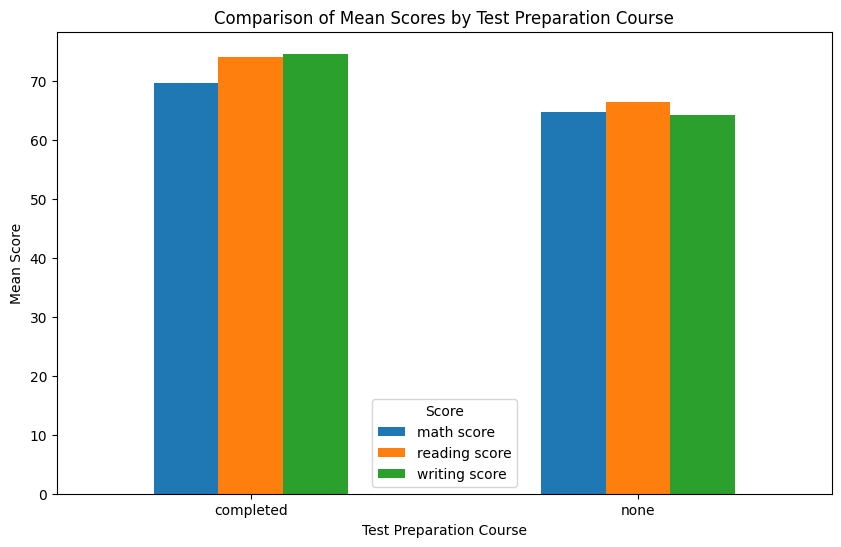

In [501]:
# Säulendiagramm
mean_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
mean_scores.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Mean Scores by Test Preparation Course')
plt.ylabel('Mean Score')
plt.xlabel('Test Preparation Course')
plt.xticks(rotation=0)

plt.legend(title='Score')
plt.show()

# 3 Data Preparation

In [502]:
df.duplicated().sum()

1

In [503]:
df[df.duplicated() == True]

gender race/ethnicity  parental level of education     lunch  \
825   male        group E                            4  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100

In [504]:
df = df.drop_duplicates()

In [505]:
df.duplicated().sum()

0

In [506]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [507]:
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

# 4 Modeling

# **4.1** Lineare Regression

In [513]:
gender_mapping = {
    'male': 1,
    'female': 2
}

df['gender'] = df['gender'].map(gender_mapping)

ethnicity_mapping = {
    'group A': 1,
    'group B': 2,
    'group C': 3,
    'group D': 4,
    'group E': 5
}

df['race/ethnicity'] = df['race/ethnicity'].map(ethnicity_mapping)

test_preparation_course_mapping = {
    'completed': 0,
    'none': 1
}

df['test preparation course'] = df['test preparation course'].map(test_preparation_course_mapping)

# education mapping wird schon weiter oben gemacht
"""
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}
"""

df['parental level of education'] = df['parental level of education'].map(education_mapping)

lunch_mapping = {
    'standard': 1,
    'free/reduced': 2
}

df['lunch'] = df['lunch'].map(lunch_mapping)

In [514]:
x = df[['gender', 'race/ethnicity', 'parental level of education', 'test preparation course', 'lunch', 'writing score', 'reading score']]
y = df['math score']

In [515]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [516]:
reg_lin = linear_model.LinearRegression()
reg_lin.fit(x_train, y_train)
y_predict = reg_lin.predict(x_test)

In [432]:
y_predict = y_predict.round(2)
pd.DataFrame([y_predict, y_test]).transpose().head(20)

0     1
0   59.83  55.0
1   68.47  61.0
2   80.76  90.0
3   64.07  66.0
4   59.71  53.0
5   56.00  54.0
6   77.09  83.0
7   59.69  59.0
8   54.96  53.0
9   71.90  64.0
10  57.72  65.0
11  55.49  62.0
12  79.63  85.0
13  69.11  71.0
14  72.48  69.0
15  51.97  58.0
16  68.84  70.0
17  59.92  58.0
18  68.27  68.0
19  84.99  84.0

# **5.1** Evaluation - Lineare Regression

In [517]:
r2 = r2_score(y_test, y_predict)
print("R^2 Score des Modells:", r2)

R^2 Score des Modells: 0.8467026084522794


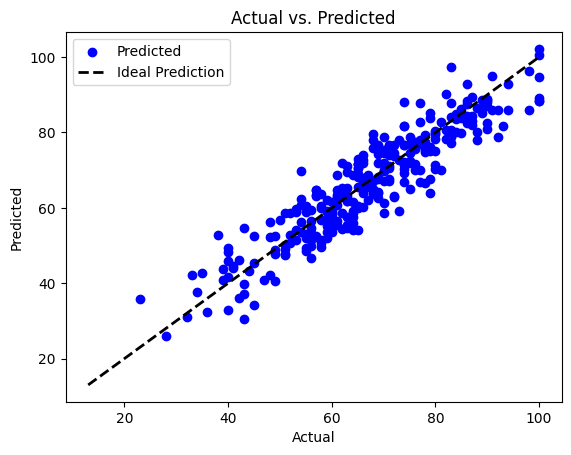

In [518]:
plt.scatter(y_test, y_predict, color='blue', label='Predicted')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# **4.2** Classification Decision Tree

In [519]:
x = df[['gender', 'parental level of education', 'test preparation course', 'math score', 'writing score', 'reading score', 'lunch']]
y = df['race/ethnicity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_dt = tree.DecisionTreeClassifier(max_depth=15)
clf_dt.fit(x, y)
y_predict = clf_dt.predict(x_test)

plt.figure(figsize=(300,30))
tree.plot_tree(clf_dt, max_depth=15, fontsize=10)

[Text(0.6167109057114648, 0.96875, 'x[3] <= 77.5\ngini = 0.762\nsamples = 1000\nvalue = [79, 205, 323, 262, 131]'),
 Text(0.2754350354535663, 0.90625, 'x[3] <= 58.5\ngini = 0.748\nsamples = 755\nvalue = [62, 171, 269, 183, 70]'),
 Text(0.11710615874820489, 0.84375, 'x[4] <= 47.5\ngini = 0.723\nsamples = 318\nvalue = [28, 83, 129, 57, 21]'),
 Text(0.08069052178075635, 0.78125, 'x[5] <= 50.5\ngini = 0.706\nsamples = 101\nvalue = [12, 20, 47, 11, 11]'),
 Text(0.05080181905217807, 0.71875, 'x[3] <= 41.5\ngini = 0.739\nsamples = 82\nvalue = [12, 19, 33, 9, 9]'),
 Text(0.016275730014360938, 0.65625, 'x[4] <= 34.5\ngini = 0.622\nsamples = 35\nvalue = [1, 9, 19, 4, 2]'),
 Text(0.0057443752991862135, 0.59375, 'x[4] <= 29.0\ngini = 0.355\nsamples = 13\nvalue = [0, 3, 10, 0, 0]'),
 Text(0.003829583532790809, 0.53125, 'x[1] <= 1.5\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0]'),
 Text(0.0019147917663954045, 0.46875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.00574437529918621

# **5.2** Evaluation - Classification Decision Tree

In [520]:
accuracy = accuracy_score(y_test, y_predict)
accuracy = accuracy.round(2)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.96


In [521]:
accuracy_cls = accuracy_score(y_test, y_predict)
mse_classification = 1 - accuracy_cls
print("Mean Squared Error des Klassifikationsmodells:", mse_classification)

Mean Squared Error des Klassifikationsmodells: 0.036666666666666625


In [522]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        22
           2       0.95      0.97      0.96        62
           3       0.97      0.95      0.96        98
           4       0.95      0.97      0.96        75
           5       1.00      0.98      0.99        43

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



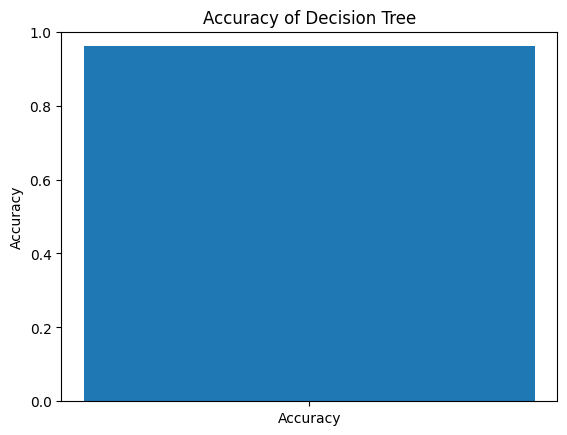

In [523]:
plt.bar(['Accuracy'], [accuracy])
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree')
plt.ylim(0, 1)
plt.show()

# 4.3 Untersuchung Zusammenhang von zwei Variabel-Paaren

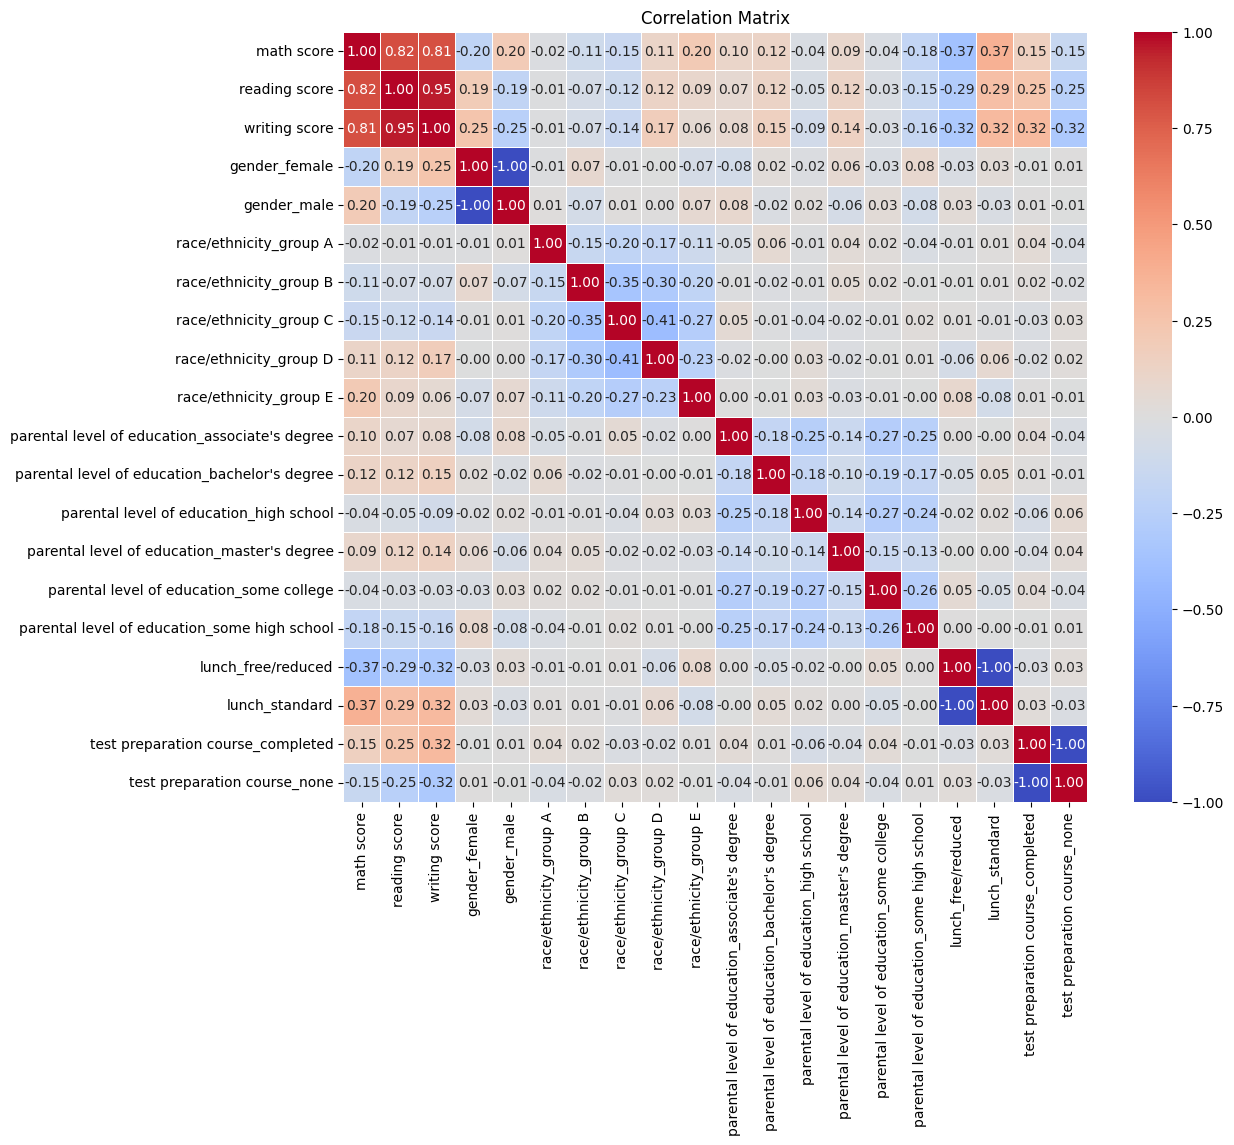

In [ ]:
df_dummies = pd.get_dummies(df)
correlation_matrix = df_dummies.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()